In [ ]:
import pandas as pd

# Assuming the files are named 'Dataset.csv' and 'Movie_Id_Titles.csv'
dataset_df = pd.read_csv('/content/Dataset.csv')
movies_df = pd.read_csv('/content/Movie_Id_Titles.csv')

# Display the first few rows to confirm the data is loaded correctly
print(dataset_df.head())
print(movies_df.head())


   user_id  item_id  rating  timestamp
0        0       50       5  881250949
1        0      172       5  881250949
2        0      133       1  881250949
3      196      242       3  881250949
4      186      302       3  891717742
   item_id              title
0        1   Toy Story (1995)
1        2   GoldenEye (1995)
2        3  Four Rooms (1995)
3        4  Get Shorty (1995)
4        5     Copycat (1995)


In [ ]:
# Merging dataset with movie titles
movie_data = pd.merge(dataset_df, movies_df, on='item_id')

# Creating a pivot table where rows represent users and columns represent movies
user_movie_matrix = movie_data.pivot_table(index='user_id', columns='title', values='rating')

# Replacing NaNs with 0s for easier computation
user_movie_matrix.fillna(0, inplace=True)

# Transposing the matrix for KNN model
movie_user_matrix = user_movie_matrix.T

# Fitting the KNN model
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(movie_user_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
def recommend_movies(movie_title, n_recommendations=5):
    if movie_title not in movie_user_matrix.index:
        return f"Movie '{movie_title}' not found in the dataset."

    # Finding the movie index
    movie_index = movie_user_matrix.index.get_loc(movie_title)

    # Finding k-nearest neighbors
    distances, indices = model_knn.kneighbors(movie_user_matrix.iloc[movie_index, :].values.reshape(1, -1), n_neighbors=n_recommendations+1)

    # Fetching recommended movie titles
    recommended_movies = [movie_user_matrix.index[indices.flatten()[i]] for i in range(1, len(indices.flatten()))]

    return recommended_movies


In [ ]:
# Example usage: Recommending movies similar to 'Toy Story (1995)'
recommendation_example = recommend_movies('Toy Story (1995)', n_recommendations=5)
print(recommendation_example)


['Star Wars (1977)', 'Return of the Jedi (1983)', 'Independence Day (ID4) (1996)', 'Rock, The (1996)', 'Mission: Impossible (1996)']


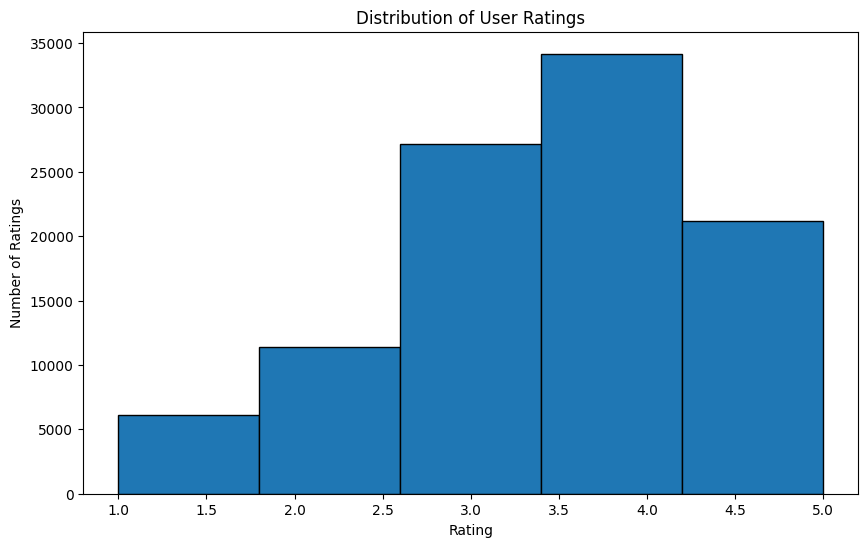

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of ratings
plt.figure(figsize=(10, 6))
plt.hist(movie_data['rating'], bins=5, edgecolor='black')
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()


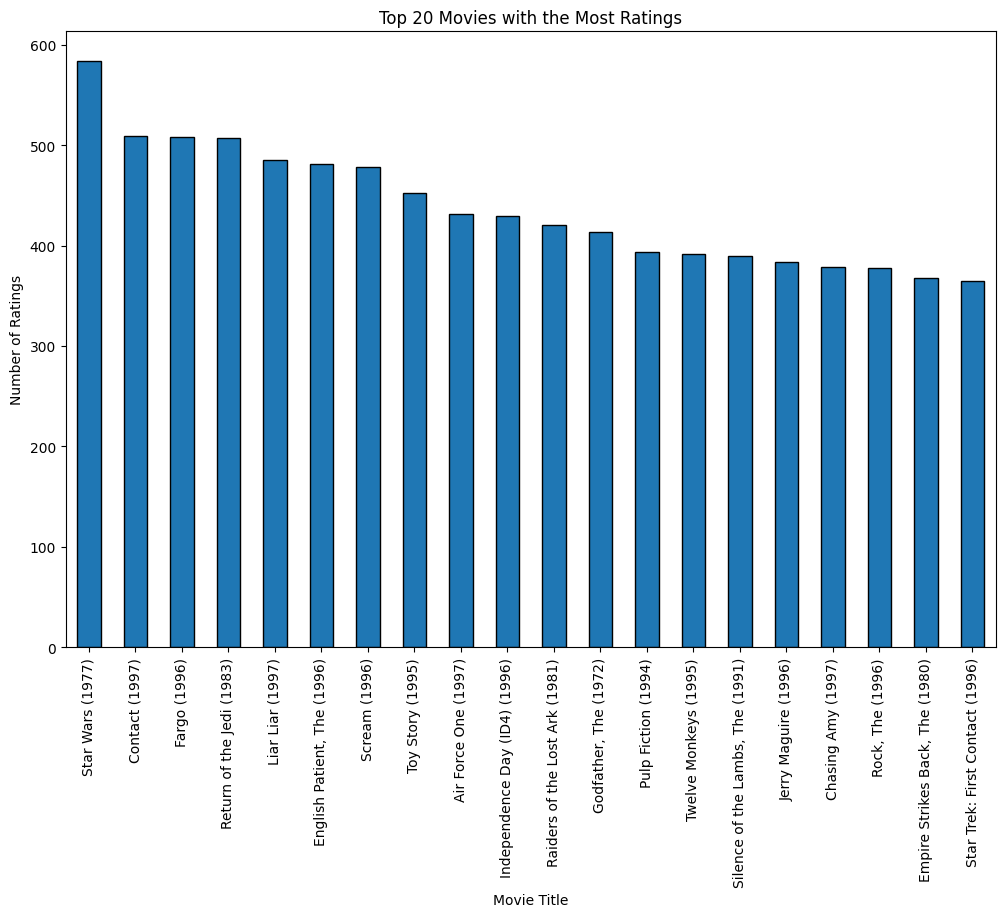

In [ ]:
# Counting the number of ratings per movie
ratings_per_movie = movie_data.groupby('title').size().sort_values(ascending=False)

# Plotting the number of ratings per movie
plt.figure(figsize=(12, 8))
ratings_per_movie[:20].plot(kind='bar', edgecolor='black')
plt.title('Top 20 Movies with the Most Ratings')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.show()
